In [14]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

#load the data 
data = pd.read_csv('auto-mpg.csv')
data.head()

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino

In [5]:
#assess the corellations between the other variables and mpg
#remove carname as it is categorical 

data= data.drop(columns=["car name"])

data.corr()["mpg"]

mpg             1.000000
cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
model year      0.580541
origin          0.565209
Name: mpg, dtype: float64

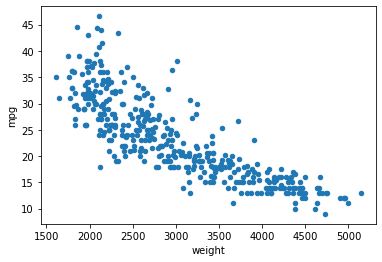

In [6]:
#build a baseline using weight as our independent variable

data.plot.scatter(x="weight", y="mpg");

In [12]:
y=data['mpg']
X_baseline = data[["weight"]]

In [15]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          6.02e-102
Time:                        20:32:57   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.0

# Simple Linear Regression Results
Looking at the summary above, we can see that the regression line we found was


The model is statistically significant overall, with an F-statistic p-value well below 0.05

The model explains about 70% of the variance in MPG

The model coefficients (const and weight) are both statistically significant, with t-statistic p-values well below 0.05

If a car weighed 0 lbs, we would expect MPG to be about 46

For each increase of 1 lb in car weight, we see an associated decrease in MPG  about .008

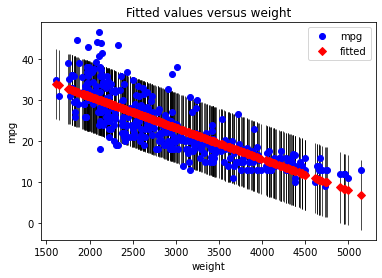

In [16]:
# Simple Linear Regression Visualization

sm.graphics.plot_fit(baseline_results, "weight")
plt.show()

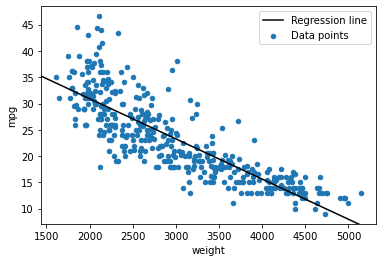

In [17]:
fig, ax = plt.subplots()
data.plot.scatter(x="weight", y="mpg", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

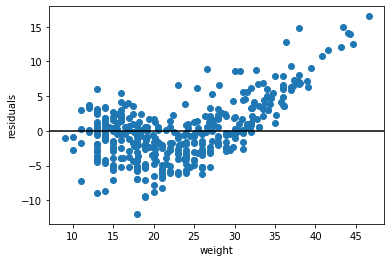

In [18]:
#The residuals 
fig, ax = plt.subplots()

ax.scatter(data["mpg"], baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("weight")
ax.set_ylabel("residuals");

## Adding Another Independent Variable



In [23]:
X_second = data[["weight", "model year"]]
X_second


weight  model year
0      3504          70
1      3693          70
2      3436          70
3      3433          70
4      3449          70
..      ...         ...
387    2790          82
388    2130          82
389    2295          82
390    2625          82
391    2720          82

[392 rows x 2 columns]

In [24]:
second_model = sm.OLS(y, sm.add_constant(X_second))
second_results = second_model.fit()

print(second_results.summary())



                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     819.5
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          3.33e-140
Time:                        20:58:38   Log-Likelihood:                -1037.6
No. Observations:                 392   AIC:                             2081.
Df Residuals:                     389   BIC:                             2093.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.3473      4.007     -3.581      0.0

## Model with Two Features Results
This time, the model we built was:


The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains about 81% of the variance in MPG
* The model coefficients (const, weight, and model year) are all statistically significant, with t-statistic p-values well below 0.05
* For each increase of 1 lb in car weight, we see an associated decrease in MPG of about .007
* This is a little bit smaller of a decrease than we saw with the simple model, but not a big change. This means that model year was not meaningfully confounding in the relationship between weight and MPG
* For each increase of 1 in the model year, we see an associated increase in MPG of about 0.76
* Notice that the const coefficient has gone from a positive number to a negative number. This is because the intercept is now with respect to both the weight and the model year. How should we interpret a value of zero for model year?

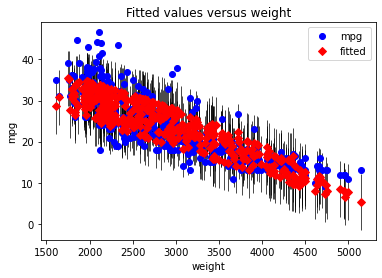

In [25]:
#Multiple linear Regression Visualization

#Model fit 

sm.graphics.plot_fit(second_results, "weight")
plt.show()

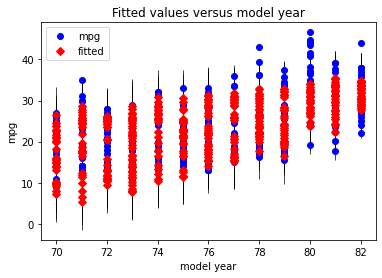

In [26]:
sm.graphics.plot_fit(second_results, "model year")
plt.show()

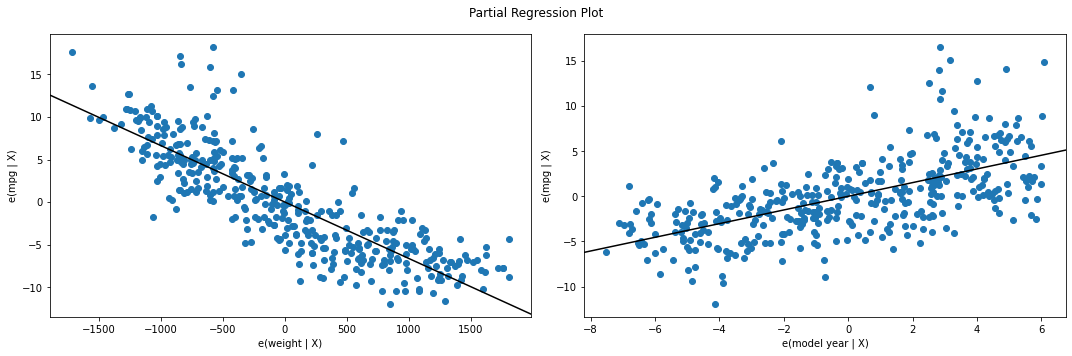

In [27]:
#Partial Regression Plot
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(second_results, exog_idx=["weight", "model year"], fig=fig)
plt.tight_layout()
plt.show()

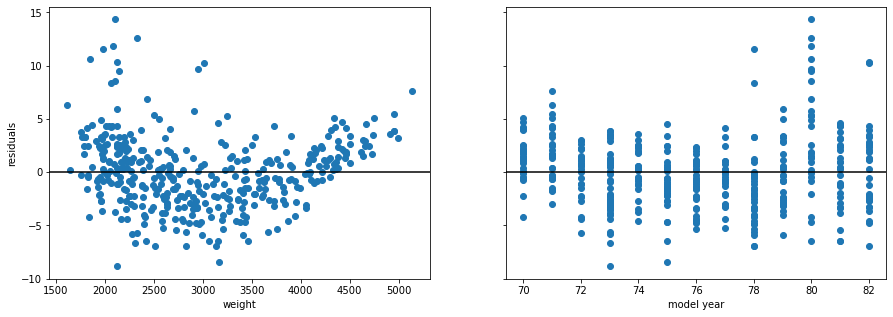

In [28]:
fig, axes = plt.subplots(ncols=2, figsize=(15,5), sharey=True)

weight_ax = axes[0]
weight_ax.scatter(data["weight"], second_results.resid)
weight_ax.axhline(y=0, color="black")
weight_ax.set_xlabel("weight")
weight_ax.set_ylabel("residuals")

year_ax = axes[1]
year_ax.scatter(data["model year"], second_results.resid)
year_ax.axhline(y=0, color="black")
year_ax.set_xlabel("model year");

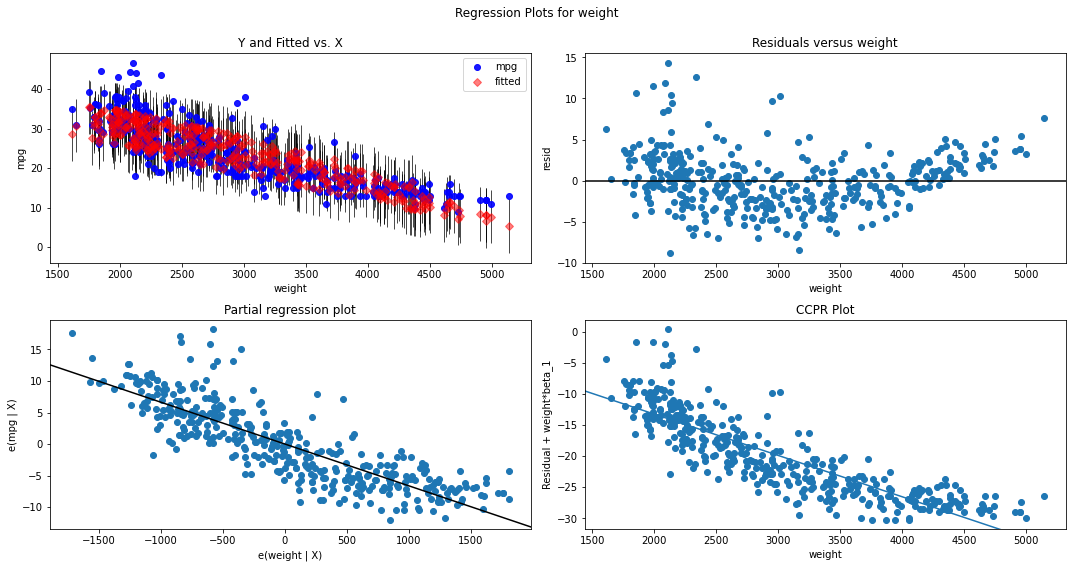

In [29]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(second_results, "weight", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(second_results, "model year", fig=fig)
plt.show()

## Multiple Regression with Many Features

In [30]:
# dropping mpg because this is our target, then only selecting numeric features
X_all = data.drop("mpg", axis=1).select_dtypes("number")
X_all

cylinders  displacement  horsepower  weight  acceleration  model year  \
0            8         307.0         130    3504          12.0          70   
1            8         350.0         165    3693          11.5          70   
2            8         318.0         150    3436          11.0          70   
3            8         304.0         150    3433          12.0          70   
4            8         302.0         140    3449          10.5          70   
..         ...           ...         ...     ...           ...         ...   
387          4         140.0          86    2790          15.6          82   
388          4          97.0          52    2130          24.6          82   
389          4         135.0          84    2295          11.6          82   
390          4         120.0          79    2625          18.6          82   
391          4         119.0          82    2720          19.4          82   

     origin  
0         1  
1         1  
2         1  
3         1  
4         1  
..      ...  
387       1  
388       2  
389       1  
390       1  
391       1  

[392 rows x 7 columns]

In [31]:
third_model = sm.OLS(y, sm.add_constant(X_all))
third_results = third_model.fit()

print(third_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          2.04e-139
Time:                        21:35:06   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

In [32]:
#Model with Many Features Results



The model is statistically significant overall, with an F-statistic p-value well below 0.05

The model explains about 82% of the variance in MPG

The fact that we went from 2 predictors to 7 predictors and only increased R-Squared by 1% is an indicator that this is not a very good model

Only some of the model coefficients are statistically significant

const, displacement, weight, model year, and origin have p-values below 0.05 and are therefore statistically significant

cylinders, horsepower, and acceleration have p-values above 0.05. This means that there is greater than a 1 in 20 chance that their true coefficients are 0 (i.e. they have no effect on MPG), and are thus not statistically significant at an alpha of 0.05




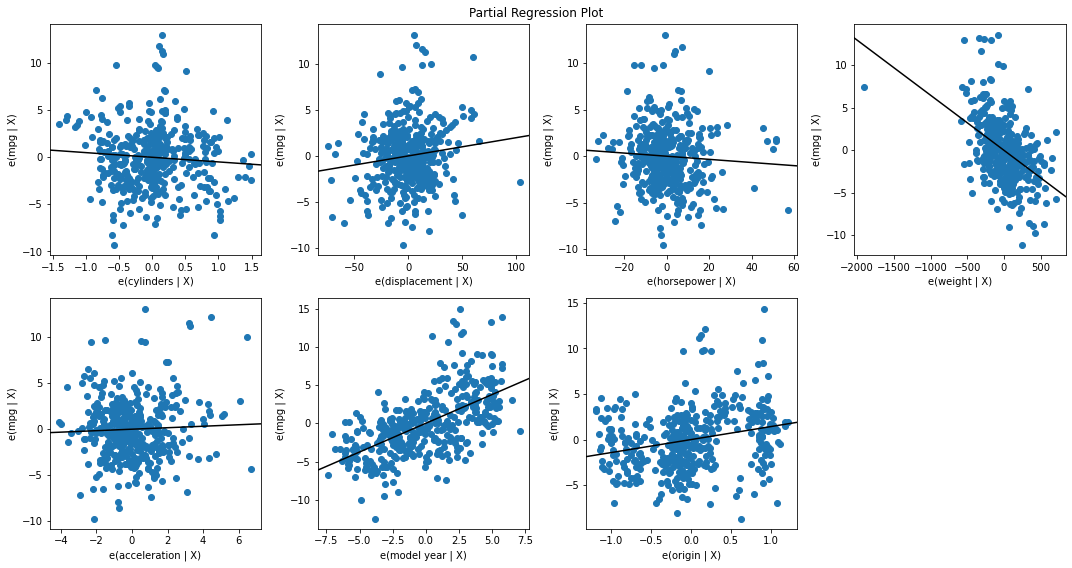

In [33]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    third_results,
    exog_idx=list(X_all.columns.values),
    grid=(2,4),
    fig=fig)
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
sklearn_baseline_model = LinearRegression()
# passing in the same X and y, although the order is reversed
sklearn_baseline_model.fit(X_baseline, y)

print(f"""
StatsModels R-Squared:    {baseline_results.rsquared}
scikit-learn R-Squared:   {sklearn_baseline_model.score(X_baseline, y)}

StatsModels intercept:    {baseline_results.params["const"]}
scikit-learn intercept:   {sklearn_baseline_model.intercept_}

StatsModels coefficient:  {baseline_results.params["weight"]}
scikit-learn coefficient: {sklearn_baseline_model.coef_[0]}
""")


StatsModels R-Squared:    0.6926304331206254
scikit-learn R-Squared:   0.6926304331206254

StatsModels intercept:    46.216524549017606
scikit-learn intercept:   46.21652454901758

StatsModels coefficient:  -0.00764734253577958
scikit-learn coefficient: -0.007647342535779579



In [36]:
#MODEL WITH TWO FEATURES
sklearn_second_model = LinearRegression()
sklearn_second_model.fit(X_second, y)

print(f"""
StatsModels R-Squared:    {second_results.rsquared}
scikit-learn R-Squared:   {sklearn_second_model.score(X_second, y)}

StatsModels intercept:     {second_results.params["const"]}
scikit-learn intercept:    {sklearn_second_model.intercept_}

StatsModels coefficients:  {second_results.params[1:].values}
scikit-learn coefficients: {sklearn_second_model.coef_}
""")


StatsModels R-Squared:    0.8081803058793998
scikit-learn R-Squared:   0.8081803058793997

StatsModels intercept:     -14.347253017615571
scikit-learn intercept:    -14.347253017615838

StatsModels coefficients:  [-0.00663208  0.75731828]
scikit-learn coefficients: [-0.00663208  0.75731828]



In [38]:
#WITH ALL NUMERIC FEATURES

sklearn_third_model = LinearRegression()
sklearn_third_model.fit(X_all, y)

print(f"""
StatsModels R-Squared:    {third_results.rsquared}
scikit-learn R-Squared:   {sklearn_third_model.score(X_all, y)}

StatsModels intercept:     {third_results.params["const"]}
scikit-learn intercept:    {sklearn_third_model.intercept_}

StatsModels coefficients:  {third_results.params[1:].values}
scikit-learn coefficients: {sklearn_third_model.coef_}
""")


StatsModels R-Squared:    0.8214780764810599
scikit-learn R-Squared:   0.82147807648106

StatsModels intercept:     -17.2184346220182
scikit-learn intercept:    -17.2184346220175

StatsModels coefficients:  [-0.49337632  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
  1.4261405 ]
scikit-learn coefficients: [-0.49337632  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
  1.4261405 ]

